## 1 - Introduction
Data Storytelling 

How do you create a data story? You’ve learned the basics, but the information is probably a bit abstract at this point. Keep in mind that storytelling is an art, so you have to get your imagination bubbling. In this project, you’ll learn some pointers to get those creative juices flowing. In the following sections, we’ll work step-by-step to create your first data story. 

Steps:
Ask the following questions and look for the answers using code and plots:
- Can you count something interesting?
- Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
- Can you make a bar plot or a histogram?
- Can you compare two related quantities?
- Can you make a scatterplot?
- Can you make a time-series plot?

Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?
Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import time
from scipy.stats import shapiro
import statsmodels.api as sm
# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#%load_ext autoreload
#%autoreload 2

In [180]:
# read data
start = time.time()
path = '/Users/cyuancheng/Documents/course/Springboard/Capstone1/data/'
df = pd.read_csv(path+'data_2012_2019_rm.csv', low_memory=False, index_col=0, \
                 parse_dates=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'] )
end = time.time()
print('It takes  ' + str(round((end-start)/60,1)) +' min to read the data')

It takes  36.7 min to read the data


In [181]:
# show missing data
(df.isnull().sum()[df.isnull().sum() >0]/len(df)*100).sort_values(ascending=False)

mths_since_recent_inq    11.503325
emp_length                7.012418
num_tl_120dpd_2m          4.322716
mo_sin_old_il_acct        4.035890
bc_util                   1.375966
                           ...    
mort_acc                  0.273494
total_bal_ex_mort         0.273494
total_bc_limit            0.273494
dti                       0.104057
inq_last_6mths            0.000037
Length: 38, dtype: float64

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2730228 entries, 10224583 to 158206429
Data columns (total 90 columns):
issue_d                       datetime64[ns]
earliest_cr_line              datetime64[ns]
last_pymnt_d                  datetime64[ns]
last_credit_pull_d            datetime64[ns]
int_rate                      float64
revol_util                    float64
hardship_flag                 object
application_type              object
title                         object
emp_length                    object
sub_grade                     object
verification_status           object
pymnt_plan                    object
debt_settlement_flag          object
grade                         object
home_ownership                object
addr_state                    object
initial_list_status           object
term                          object
loan_status                   object
purpose                       object
loan_amnt                     float64
funded_amnt                  

In [183]:
df.columns

Index(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d',
       'int_rate', 'revol_util', 'hardship_flag', 'application_type', 'title',
       'emp_length', 'sub_grade', 'verification_status', 'pymnt_plan',
       'debt_settlement_flag', 'grade', 'home_ownership', 'addr_state',
       'initial_list_status', 'term', 'loan_status', 'purpose', 'loan_amnt',
       'funded_amnt', 'funded_amnt_inv', 'int_rate.1', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util.1',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',


## 2 - EDA

The dataset was download from [Lending Club](https://www.lendingclub.com/statistics/additional-statistics?). It contains information from 2015 to 2019. 

**Data manipulation**: 

    - Deal with missing value 
    - check each feature
        - observe distribution (normality for particular features)
        - Remove outliner (standard deviation)



In [15]:
df.head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d,int_rate,revol_util,hardship_flag,application_type,title,emp_length,sub_grade,verification_status,pymnt_plan,debt_settlement_flag,grade,home_ownership,addr_state,initial_list_status,term,loan_status,purpose,loan_amnt,funded_amnt,funded_amnt_inv,int_rate.1,...,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68367011,2015-12-01,2005-01-01,2018-08-01,2020-01-01,13.99,87.4,N,Individual,Credit card refinancing,< 1 year,C4,Source Verified,n,N,C,RENT,OH,w,60 months,Fully Paid,credit_card,21000.0,21000.0,21000.0,13.99,...,0.0,85.0,0.0,0.0,3.0,3.0,4.0,4.0,11.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,1.0,100.0,75.0,0.0,0.0,370357.0,372407.0,23300.0,347057.0
68537655,2015-12-01,1997-06-01,2020-01-01,2017-11-01,12.88,24.1,N,Individual,Debt consolidation,10+ years,C2,Not Verified,n,N,C,MORTGAGE,MO,w,60 months,Current,debt_consolidation,16800.0,16800.0,16800.0,12.88,...,4.0,11.0,11.0,12.0,3.0,3.0,4.0,22.0,12.0,5.0,28.0,3.0,11.0,0.0,0.0,0.0,1.0,64.4,25.0,0.0,0.0,412771.0,75808.0,12600.0,115941.0
68356421,2015-12-01,1995-04-01,2020-01-01,2020-01-01,12.88,32.7,N,Individual,Debt consolidation,6 years,C2,Not Verified,n,N,C,MORTGAGE,SC,w,60 months,Current,debt_consolidation,22400.0,22400.0,22400.0,12.88,...,5.0,1.0,14.0,2.0,3.0,8.0,4.0,5.0,15.0,10.0,15.0,8.0,16.0,0.0,0.0,0.0,3.0,97.0,25.0,0.0,0.0,436841.0,184356.0,21000.0,191682.0
68466926,2015-12-01,2002-04-01,2018-08-01,2020-01-01,6.49,34.5,N,Individual,Credit card refinancing,6 years,A2,Not Verified,n,N,A,RENT,PA,w,36 months,Fully Paid,credit_card,10000.0,10000.0,10000.0,6.49,...,1.0,4.0,1.0,0.0,6.0,9.0,7.0,10.0,3.0,13.0,19.0,9.0,14.0,0.0,0.0,0.0,2.0,95.7,28.6,1.0,0.0,61099.0,27957.0,16400.0,30799.0
68616873,2015-12-01,1994-11-01,2017-04-01,2018-11-01,11.48,39.1,N,Individual,Credit card refinancing,10+ years,B5,Not Verified,n,N,B,MORTGAGE,RI,w,36 months,Fully Paid,credit_card,8000.0,8000.0,8000.0,11.48,...,1.0,50.0,10.0,1.0,3.0,3.0,3.0,6.0,5.0,5.0,11.0,3.0,8.0,0.0,0.0,0.0,2.0,94.4,33.3,0.0,0.0,256513.0,113782.0,17000.0,135513.0


In [19]:
df.select_dtypes('object').columns.to_list()

['hardship_flag',
 'application_type',
 'title',
 'emp_length',
 'sub_grade',
 'verification_status',
 'pymnt_plan',
 'debt_settlement_flag',
 'grade',
 'home_ownership',
 'addr_state',
 'initial_list_status',
 'term',
 'loan_status',
 'purpose']

In [20]:
df.select_dtypes('float').columns.to_list()

['int_rate',
 'revol_util',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate.1',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util.1',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_re

In [21]:
df.select_dtypes('datetime').columns.to_list()

['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

### 1. Loan status

In [184]:
df['loan_status'].value_counts(normalize=True)*100

Fully Paid            49.322914
Current               37.280110
Charged Off           12.002587
Late (31-120 days)     0.829162
In Grace Period        0.393887
Late (16-30 days)      0.169180
Default                0.001758
Issued                 0.000403
Name: loan_status, dtype: float64

In [288]:
df_time = df[['issue_d','loan_status','term','loan_amnt']]
df_time.set_index('issue_d',inplace=True)
df_time.head() 

,loan_status,term,loan_amnt
issue_d,,,
2013-12-01,Fully Paid,36 months,11100.0
2013-12-01,Fully Paid,36 months,12000.0
2013-12-01,Fully Paid,36 months,27050.0
2013-12-01,Fully Paid,36 months,12000.0
2013-12-01,Fully Paid,36 months,4800.0


In [289]:
df_time['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [297]:
#test = df_time.query("term == ' 36 months'" )
test = df_time.query("loan_status in ['Fully Paid', 'Charged Off'] & term == ' 36 months'")

In [299]:
test.head()#['term'].unique()

,loan_status,term,loan_amnt
issue_d,,,
2013-12-01,Fully Paid,36 months,11100.0
2013-12-01,Fully Paid,36 months,12000.0
2013-12-01,Fully Paid,36 months,27050.0
2013-12-01,Fully Paid,36 months,12000.0
2013-12-01,Fully Paid,36 months,4800.0


<Figure size 1440x360 with 0 Axes>

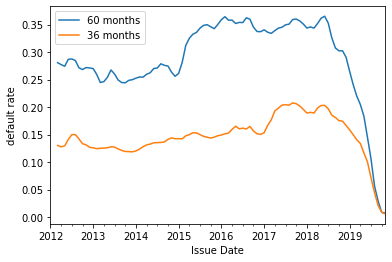

In [314]:
# default rate over years
plt.figure(figsize=(20,5)) 


df_time_default_60m = df_time.query("loan_status in ['Fully Paid', 'Charged Off'] & term == ' 60 months'")\
.groupby('issue_d')['loan_status'].value_counts(normalize=True).to_frame()
df_time_default_60m.rename(columns={'loan_status':'60 months'}, inplace=True)
df_time_default_60m.reset_index(level=1,inplace=True)
ax = df_time_default_60m.query(" loan_status == 'Charged Off' ").rolling(3).mean().plot(label='60 months')

df_time_default_36m = df_time.query("loan_status in ['Fully Paid', 'Charged Off'] & term == ' 36 months'")\
.groupby('issue_d')['loan_status'].value_counts(normalize=True).to_frame()
df_time_default_36m.rename(columns={'loan_status':'36 months'}, inplace=True)
df_time_default_36m.reset_index(level=1,inplace=True)
df_time_default_36m.query(" loan_status == 'Charged Off' ").rolling(3).mean().plot(label='36 months', ax=ax)

ax.axvline("2019-07-24", color="red", linestyle="--")

plt.xlabel('Issue Date')
plt.ylabel('default rate')
plt.legend()
plt.show()

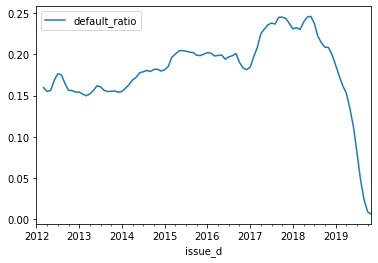

In [197]:
# default rate over years
df_time_default = df_time.query("loan_status == 'Fully Paid' or loan_status == 'Charged Off' or term == '60 months'")\
.groupby('issue_d')['loan_status'].value_counts(normalize=True).to_frame()
df_time_default.rename(columns={'loan_status':'default_ratio'}, inplace=True)
df_time_default.reset_index(level=1,inplace=True)
#df_time_default.head()
df_time_default.query(" loan_status == 'Charged Off' ").rolling(3).mean().plot()
#df_time_default.query(" loan_status == 'Charged Off' ").head()
#df_time_default.head()

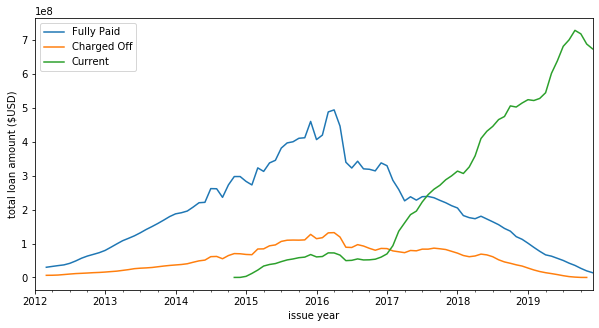

In [187]:

plt.figure(figsize=(10,5)) 

df_time.query(" loan_status == 'Fully Paid' ")['loan_amnt']\
    .resample('M').sum().rolling(3).mean().plot(label='Fully Paid')
df_time.query(" loan_status == 'Charged Off' ")['loan_amnt']\
    .resample('M').sum().rolling(3).mean().plot(label='Charged Off')
df_time.query(" loan_status == 'Current' ")['loan_amnt']\
    .resample('M').sum().rolling(3).mean().plot(label='Current')

plt.legend()
plt.ylabel('total loan amount ($USD)')
plt.xlabel('issue year')
plt.show()

#.sum().rolling(4).mean()

Although there is available information on all the funded loans from 2012 to 2019, only loans
funded until 2017 can be analyzed. It is because the status of later loans (defaulted or non-
defaulted) is still unknown. This happens because the minimum maturity of Lending Club
loans is 36 months. Therefore, for the LC data with 36 months term, we can only analyze the data until 2017. similarly, for the LC data with 60 months term, we can only analze the data until 2015.


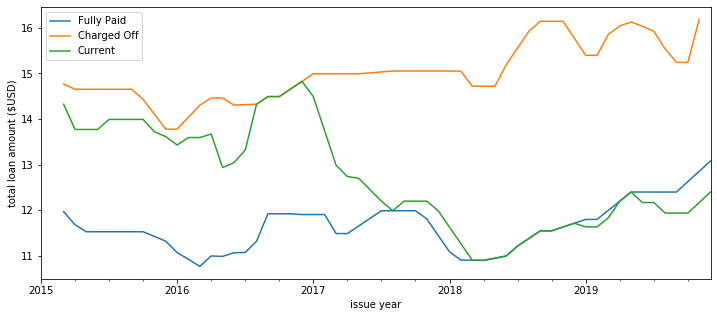

In [176]:

plt.figure(figsize=(12,5)) 

df_time.query(" loan_status == 'Fully Paid' ")['int_rate']\
    .resample('M').median().rolling(3).mean().plot(label='Fully Paid')
df_time.query(" loan_status == 'Charged Off' ")['int_rate']\
    .resample('M').median().rolling(3).mean().plot(label='Charged Off')
df_time.query(" loan_status == 'Current' ")['int_rate']\
    .resample('M').median().rolling(3).mean().plot(label='Current')

plt.legend()
plt.ylabel('total loan amount ($USD)')
plt.xlabel('issue year')
plt.show()

#.sum().rolling(4).mean()

### 1. Distrubution of loan and funded amount 

Text(0, 0.5, 'Average loan amount issued')

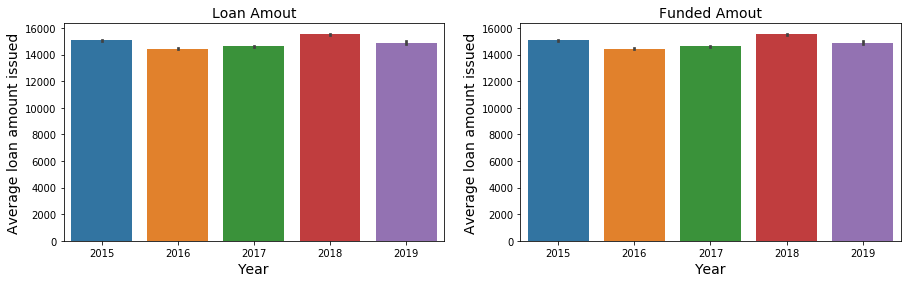

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,4))
sns.barplot('issue_year', 'loan_amnt', data=df, palette='tab10', ax=ax1)
ax1.set_title('Loan Amout',fontsize=14)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Average loan amount issued', fontsize=14)

sns.barplot('issue_year', 'funded_amnt', data=df, palette='tab10', ax=ax2)
ax2.set_title('Funded Amout',fontsize=14)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Average loan amount issued', fontsize=14)

Text(0, 0.5, 'Frequency')

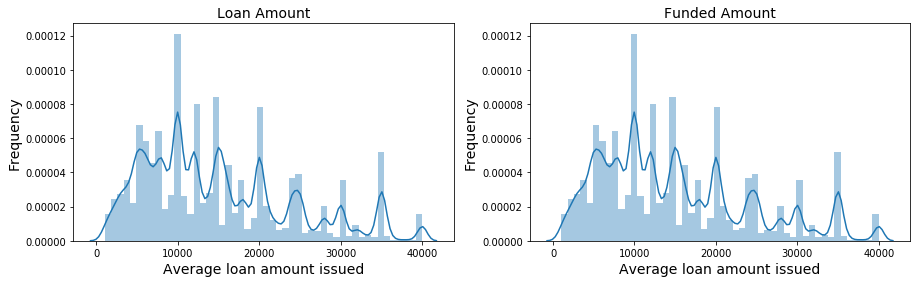

In [15]:
# Distribution for loan amount and funded amount
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,4))
sns.distplot(df['loan_amnt'].values, bins=50, ax=ax1)
ax1.set_title('Loan Amount', fontsize=14)
ax1.set_xlabel('Average loan amount issued', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)

sns.distplot(df['funded_amnt'].values, bins=50, ax=ax2)
ax2.set_title('Funded Amount', fontsize=14)
ax2.set_xlabel('Average funded amount issued', fontsize=14)
ax2.set_ylabel('Frequency', fontsize=14)

- The average amount of loan and fund issued is similar in past 5 years. 
- Most of the loan issued around $10000.
- The amount issued to the borrowers and the amount funded by investors have a similar distribution, meaning that it is most likely that qualified borrowers are going to get the loan they had applied for.

### 2.  Good vs bad loan over year

In [ ]:
#df['loan_status']
sns.barplot('loan_status', data=df)
#ax1.set_title('Loan Amout',fontsize=14)
#ax1.set_xlabel('Year', fontsize=14)
#ax1.set_ylabel('Average loan amount issued', fontsize=14)


In [ ]:
# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# plotly.tools.set_credentials_file(username='AlexanderBach', api_key='o4fx6i1MtEIJQxfWYvU1')


### 3 states

In [16]:
states = df['addr_state'].unique()
print(states)

['OH' 'PA' 'RI' 'SC' 'NC' 'AZ' 'VA' 'NY' 'KS' 'AL' 'NM' 'TX' 'MD' 'WA'
 'GA' 'LA' 'IL' 'CO' 'FL' 'MI' 'MO' 'IN' 'WI' 'CA' 'VT' 'TN' 'MA' 'NJ'
 'OR' 'SD' 'MN' 'DC' 'DE' 'NH' 'NE' 'AR' 'NV' 'MT' 'WV' 'HI' 'OK' 'WY'
 'KY' 'CT' 'MS' 'UT' 'ND' 'ME' 'AK' 'ID']


In [17]:
df['addr_state'].nunique()

50

Census Bureau-designated regions and divisions
https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States


In [18]:
# Make a list with each of the regions by state.

northeast = ['CT','ME','MA','NH','RI','VT','NJ','NY','PA']
midwest = ['IL','IN','MI','OH','WI','IA','KS','MN','MO','NE','ND','SD']
south = ['DE','FL','GA','AZ','MD','NC','SC','VA','DC','WV','AL','KY','MS','TN','AR','LA','OK','TX']
west = ['CO','ID','MT','NV','NM','UT','WY','AK','CA','HI','OR','WA']
states_all = northeast + midwest + south + west
assert len(states_all) == 51


In [19]:
# find out which state is missing
set(states_all).difference(set(states))


{'IA'}

According to Lending club website, LC does not accept borrower resident in Iowa.
https://blog.lendingclub.com/is-lending-club-available-in-my-state/


In [23]:
# add region column
df['region'] = np.nan

def finding_regions(state):
    if state in northeast:
        return 'northeast'
    elif state in midwest:
        return 'midwest'
    elif state in south:
        return 'south'
    elif state in west:
        return 'west'
    
df['region'] = df['addr_state'].apply(finding_regions)

In [24]:
df_state_loan_amnt = df.groupby(['region','addr_state'])['loan_amnt'].sum().sort_values(ascending=False).to_frame().reset_index()
df_state_income = df.groupby(['region','addr_state'])['annual_inc'].median().sort_values(ascending=False).to_frame().reset_index()

df_target = df.groupby(['region','addr_state'])['target'].value_counts(normalize=True).to_frame()
df_target = df_target.iloc[df_target.index.get_level_values('target') == 1]\
    .rename(columns={"target": "default_rate"}).reset_index().sort_values(by=["default_rate"], ascending=False)

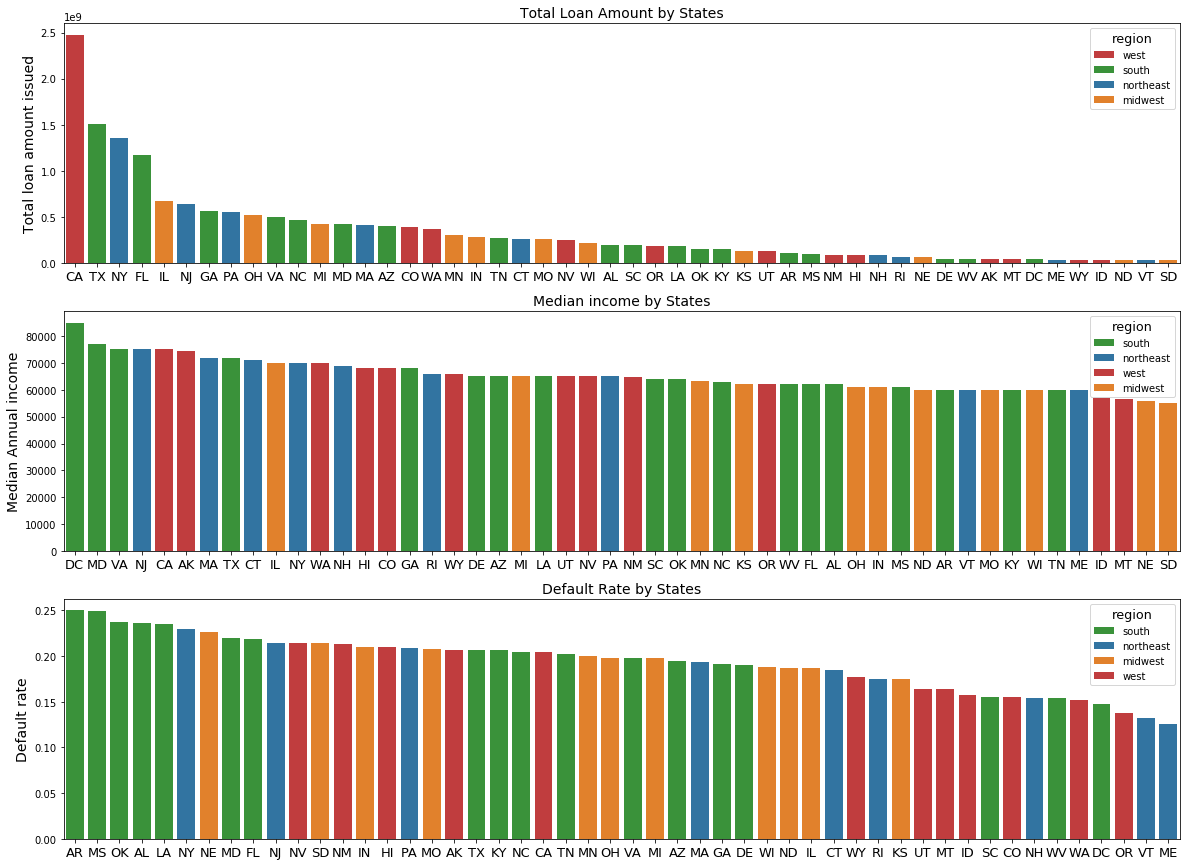

In [58]:

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=False, figsize=(20,15))

palette ={"northeast":"C0","midwest":"C1","south":"C2", "west":"C3"}

sns.barplot('addr_state', 'loan_amnt', hue='region', dodge=False, \
            data=df_state_loan_amnt,ax=ax1, palette=palette)
ax1.set_title('Total Loan Amount by States',fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Total loan amount issued', fontsize=14)

sns.barplot('addr_state', 'annual_inc', hue='region',dodge=False, \
            data=df_state_income, ax=ax2, palette=palette) 
ax2.set_title('Median income by States',fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Median Annual income', fontsize=14)

sns.barplot('addr_state', 'default_rate', hue='region',dodge=False, \
            data=df_target, ax=ax3,palette=palette)
ax3.set_title('Default Rate by States',fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Default rate', fontsize=14)

# adjust font size
for ax in (ax1, ax2, ax3):
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)

In [41]:
df_region_loan_amnt = df.groupby(['region'])['loan_amnt'].sum().sort_values(ascending=False).to_frame().reset_index()
df_region_income = df.groupby(['region'])['annual_inc'].median().sort_values(ascending=False).to_frame().reset_index()

df_region_target = df.groupby(['region'])['target'].value_counts(normalize=True).to_frame()
df_region_target = df_region_target.iloc[df_region_target.index.get_level_values('target') == 1]\
    .rename(columns={"target": "default_rate"}).reset_index().sort_values(by=["default_rate"], ascending=False)

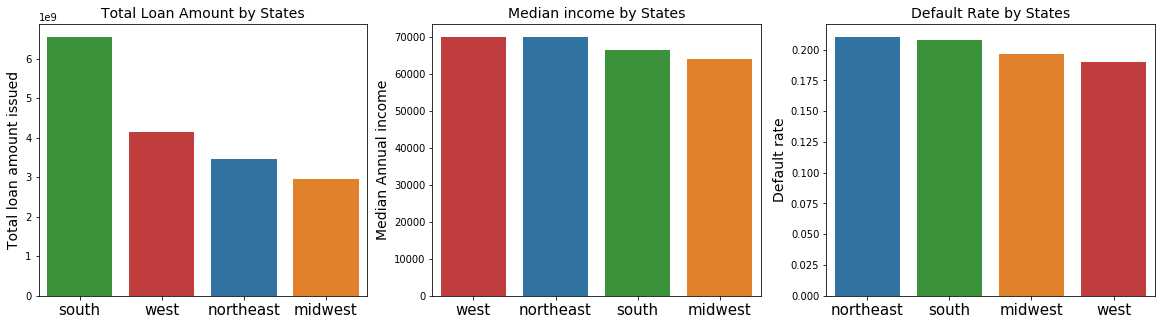

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False, figsize=(20,5))

palette ={"northeast":"C0","midwest":"C1","south":"C2", "west":"C3"}

sns.barplot(x='region', y='loan_amnt', data=df_region_loan_amnt, ax=ax1, palette=palette)
ax1.set_title('Total Loan Amount by States',fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Total loan amount issued', fontsize=14)

sns.barplot('region', 'annual_inc', data=df_region_income, ax=ax2, palette=palette) 
ax2.set_title('Median income by States',fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Median Annual income', fontsize=14)

sns.barplot('region', 'default_rate', data=df_region_target , ax=ax3,palette=palette)
ax3.set_title('Default Rate by States',fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Default rate', fontsize=14)

# adjust font size
for ax in (ax1, ax2, ax3):
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15)

In [110]:
# join dataframes
df_join = pd.merge(df_state_loan_amnt[['addr_state','loan_amnt']],
                    df_state_income[['addr_state', 'annual_inc']],
                    on='addr_state', how='inner')

df_join = pd.merge(df_join, df_target[['addr_state', 'default_rate']],on='addr_state', how='inner')

In [111]:
df_join = df_join.rename(columns={'addr_state':'state', 'loan_amnt':'loan_amount', 'annual_inc': 'income'})
df_join.head()

,state,loan_amount,income,default_rate
0,CA,2.474906e+09,75000.0,0.203983
1,TX,1.510895e+09,72000.0,0.206664
2,NY,1.354495e+09,70000.0,0.229015
3,FL,1.176397e+09,62000.0,0.218462
4,IL,6.793398e+08,70000.0,0.186607


In [112]:
# round default rate
df_join['default_rate'] = df_join['default_rate'].apply(lambda x: round(x*100, 1))

In [124]:
# Now it comes the part where we plot out plotly United States map
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

df_map1=df_join.copy()

# convert to values to string
for col in df_map1.columns:
    df_map1[col] = df_map1[col].astype(str)
    
df_map1['text'] = df_map1['state'] + '<br>' +\
'Mean default rate: ' + df_map1['default_rate'] + ' %' +'<br>'+\
'Median annual income: ' + df_map1['income'] 


data = [ dict(
        type='choropleth',
        colorscale = 'Reds', # discrete color for the map
        autocolorscale = False,
        locations = df_map1['state'],
        z = df_map1['loan_amount'], 
        locationmode = 'USA-states',
        text = df_map1['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$ USD")
        ) ]


layout = dict(
    title = 'Total Issued Loan Amount in USA'+'<br>' +'(2015-2019)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

#### risk analysis

In [126]:
#average_dti	average_emp_length, fico
df.columns

Index(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'issue_year', 'int_rate',
       'revol_util', 'term', 'grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'addr_state',
       'loan_amnt', 'funded_amnt', 'installment', 'annual_inc', 'dti',
       'revol_bal', 'delinq_2yrs', 'open_acc', 'pub_rec', 'fico_range_high',
       'fico_range_low', 'total_pymnt', 'recoveries', 'target', 'loan_period',
       'log_annual_inc', 'log_dti', 'log_revol_bal', 'delinq_2yrs_str',
       'pub_rec_str', 'fico', 'region'],
      dtype='object')

In [129]:
df['fico'].head()

0    684.0
3    689.0
4    704.0
5    709.0
6    724.0
Name: fico, dtype: float64

In [131]:
df['emp_length'].unique()

array(['< 1 year', '6 years', '10+ years', '8 years', '2 years',
       '9 years', '1 year', '5 years', '4 years', '7 years', '3 years'],
      dtype=object)

In [135]:
def finding_emp_length(emp_length):
    if emp_length == '< 1 year':
        return 0
    elif emp_length == '1 year':
        return 1
    elif emp_length == '2 years':
        return 2
    elif emp_length == '3 years':
        return 3
    elif emp_length == '4 years':
        return 4
    elif emp_length == '5 years':
        return 5
    elif emp_length == '6 years':
        return 6
    elif emp_length == '7 years':
        return 7
    elif emp_length == '8 years':
        return 8
    elif emp_length == '9 years':
        return 9
    elif emp_length == '10+ years':
        return 10

    
df['emp_length_num'] = df['emp_length'].apply(finding_emp_length)

In [137]:
df_state_emp_length_num = df.groupby(['region','addr_state'])['emp_length_num'].median().sort_values(ascending=False).to_frame().reset_index()
df_state_fico = df.groupby(['region','addr_state'])['fico'].median().sort_values(ascending=False).to_frame().reset_index()
df_state_dti = df.groupby(['region','addr_state'])['dti'].median().sort_values(ascending=False).to_frame().reset_index()

In [142]:
# join dataframes
df_join_2 = pd.merge(df_state_emp_length_num[['addr_state','emp_length_num']],
                    df_state_fico[['addr_state', 'fico']],
                     on='addr_state', how='inner')

df_join_2 = pd.merge(df_join_2, df_state_dti[['addr_state', 'dti']],on='addr_state', how='inner')
df_join_2 = pd.merge(df_join_2, df_target[['addr_state', 'default_rate']],on='addr_state', how='inner')

In [145]:
df_join_2 = df_join_2.rename(columns={'addr_state':'state', 'emp_length_num':'employee_length'})
df_join_2.head()

,state,employee_length,fico,dti,default_rate
0,HI,8,694.0,19.140,0.209532
1,DE,7,694.0,18.705,0.190000
2,WI,7,694.0,19.110,0.188421
3,VT,7,699.0,19.960,0.132293
4,RI,7,694.0,17.040,0.174566


In [153]:
# Now it comes the part where we plot out plotly United States map
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

df_map2=df_join_2.copy()

# convert to values to string
for col in df_map2.columns:
    df_map2[col] = df_map2[col].astype(str)
    
df_map2['text'] = df_map2['state'] + '<br>' +\
'Median Credit Scores: ' + df_map2['fico'] +'<br>'+\
'Median Debit-to-income: ' + df_map2['dti'] +'<br>'+\
'Median Employee Length: ' + df_map2['employee_length'] +' years'


data = [ dict(
        type='choropleth',
        colorscale = 'Blues', # discrete color for the map
        autocolorscale = False,
        locations = df_map2['state'],
        z = df_map2['default_rate'], 
        locationmode = 'USA-states',
        text = df_map2['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]


layout = dict(
    title = 'Default Rate in USA' +'<br>' + '(2015-2019)' ,
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map-2')

Text(0, 0.5, 'Average fico')

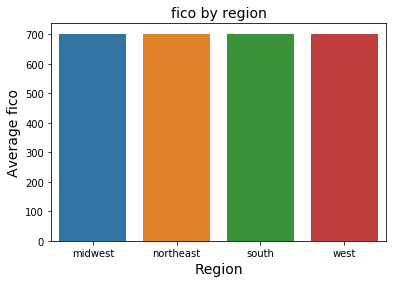

In [40]:
sns.barplot('region', 'fico', data=df)
plt.title('fico by region',fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average fico', fontsize=14)

In [43]:
df.groupby('region')['fico'].mean().sort_values(ascending=True)

region
west         701.033997
south        701.078206
midwest      701.269858
northeast    702.049231
Name: fico, dtype: float64

In [64]:
df.groupby(['region'])['loan_status'].value_counts(normalize=True)#.sort_values(ascending=False)

region     loan_status
midwest    Fully Paid     0.803337
           Charged Off    0.196663
northeast  Fully Paid     0.789714
           Charged Off    0.210286
south      Fully Paid     0.791852
           Charged Off    0.208148
west       Fully Paid     0.809990
           Charged Off    0.190010
Name: loan_status, dtype: float64

In [39]:
df.columns#['addr_state']

Index(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'issue_year', 'int_rate',
       'revol_util', 'term', 'grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'addr_state',
       'loan_amnt', 'funded_amnt', 'installment', 'annual_inc', 'dti',
       'revol_bal', 'delinq_2yrs', 'open_acc', 'pub_rec', 'fico_range_high',
       'fico_range_low', 'total_pymnt', 'recoveries', 'target', 'loan_period',
       'log_annual_inc', 'log_dti', 'log_revol_bal', 'delinq_2yrs_str',
       'pub_rec_str', 'fico', 'region'],
      dtype='object')

### 3 maps

In [68]:
# Now it comes the part where we plot out plotly United States map
import plotly as py
import plotly.graph_objs as go


In [71]:
group_loan_amnt = df.groupby('addr_state')['loan_amnt'].sum().sort_values()


In [72]:
group_loan_amnt

addr_state
SD    3.303305e+07
VT    3.312748e+07
ND    3.330028e+07
ID    3.589325e+07
WY    3.664650e+07
          ...     
IL    6.793398e+08
FL    1.176397e+09
NY    1.354495e+09
TX    1.510895e+09
CA    2.474906e+09
Name: loan_amnt, Length: 50, dtype: float64

In [ ]:
by_loan_amount = df.groupby(['region','addr_state'], as_index=False).loan_amount.sum()
by_interest_rate = df.groupby(['region', 'addr_state'], as_index=False).interest_rate.mean()
by_income = df.groupby(['region', 'addr_state'], as_index=False).annual_income.mean()